## Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. This project is just meant to show the application of recurrent neural network on financial analysis. it is not meant to be a robust financial analysis or be taken as financial advice.

The focus is on automobile stocks to see how they progressed throughout the financial ups and downs all the way till May 24, 2019.

#### Data Collection:
I use pandas to directly read data from Yahoo finance using pandas-datareader to read stock information directly from the internet. 
I collect the stock information for the following car companies:

    Fiat Chrysler Automobiles N.V. (FCAU)
    Ford Motor Company (F)
    General Motors Company (GM)
    Honda Motor Co., Ltd. (HMC)
    Tesla, Inc. (TSLA)
    Toyota Motor Corporation (TM)
    Volkswagen AG (VOW3.DE)  


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

C:\Users\Christy\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [2]:
Fiat = data.DataReader("FCAU", data_source="yahoo", start = "2010-06-07", end = "2019-05-24")
Fiat.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-09,2.883816,2.883816,2.883816,2.883816,0.0,2.496576
2010-06-10,2.883816,2.883816,2.883816,2.883816,0.0,2.496576
2010-06-11,2.883816,2.883816,2.883816,2.883816,0.0,2.496576
2010-06-14,2.883816,2.883816,2.883816,2.883816,0.0,2.496576
2010-06-15,2.883816,2.883816,2.883816,2.883816,0.0,2.496576


In [3]:
Ford = data.DataReader("F", data_source="yahoo", start = "1972-06-01", end = "2019-05-24")
Ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1972-06-01,2.173495,2.149165,2.149165,2.153220,1089200.0,0.002942
1972-06-02,2.173495,2.141055,2.153220,2.149165,1173500.0,0.002936
1972-06-05,2.169440,2.141055,2.149165,2.149165,5208100.0,0.002936
1972-06-06,2.157275,2.116725,2.149165,2.124835,1421400.0,0.002903
1972-06-07,2.137000,2.112669,2.124835,2.112669,671800.0,0.002886


In [4]:
GM = data.DataReader("GM", data_source="yahoo", start = "2010-11-15", end = "2019-05-24")
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,27.316826
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,27.372751
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,27.228945
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,26.565796
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,26.749556


In [5]:
Honda = data.DataReader("HMC", data_source="yahoo", start = "1980-03-01", end = "2019-05-24")
Honda.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-03-17,0.909375,0.893750,0.893750,0.893750,26000.0,0.345008
1980-03-18,0.909375,0.909375,0.909375,0.909375,2000.0,0.351039
1980-03-19,0.898435,0.898435,0.898435,0.898435,2000.0,0.346816
1980-03-20,0.898435,0.898435,0.898435,0.898435,0.0,0.346816
1980-03-21,0.898435,0.898435,0.898435,0.898435,2000.0,0.346816


In [6]:
Tesla = data.DataReader("TSLA", data_source="yahoo", start = "2010-06-28", end = "2019-05-24")
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [7]:
Toyota = data.DataReader("TM", data_source="yahoo", start = "1976-08-01", end = "2019-05-24")
Toyota.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1976-08-18,2.562200,2.562200,2.562200,2.562200,19500.0,1.510903
1976-08-19,2.549578,2.549578,2.549578,2.549578,500.0,1.503460
1976-08-20,2.536956,2.536956,2.536956,2.536956,8000.0,1.496017
1976-08-23,2.461226,2.461226,2.461226,2.461226,1000.0,1.451360
1976-08-24,2.435982,2.435982,2.435982,2.435982,7500.0,1.436473


In [8]:
Volks = data.DataReader("VOW3.DE", data_source="yahoo", start = "1998-07-01", end = "2019-05-24")
Volks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1998-07-22,65.053703,63.148201,63.148201,64.596497,56337.0,34.962700
1998-07-23,65.816101,61.750599,65.308197,61.750599,95571.0,33.422371
1998-07-24,62.258499,59.869900,60.988201,61.496101,154423.0,33.284630
1998-07-27,62.005001,59.463299,61.496101,59.717800,62876.0,32.322124
1998-07-28,61.445400,57.837101,59.209900,58.294399,116195.0,31.551706


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers = ['Fiat', 'Ford', 'GM', 'Honda', 'Tesla', 'Toyota', 'Volks']

** Use pd.concat to concatenate the auto dataframes together to a single data frame called auto_stocks. Set the keys argument equal to the tickers list.**

In [10]:
auto_stocks = pd.concat([Fiat, Ford, GM, Honda, Tesla, Toyota, Volks],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [11]:
auto_stocks.columns.names = ['Auto Company','Stock Info']

** Check the head of the auto_stocks dataframe.**

In [12]:
auto_stocks.tail()

Auto Company   Fiat                                             Ford         \
Stock Info     High    Low   Open  Close     Volume Adj Close   High    Low   
Date                                                                          
2019-05-20    13.40  13.14  13.21  13.37  4897900.0     13.37  10.30  10.20   
2019-05-21    13.34  13.18  13.27  13.26  3815100.0     13.26  10.31  10.15   
2019-05-22    13.26  13.02  13.22  13.03  3364300.0     13.03  10.21   9.93   
2019-05-23    12.81  12.61  12.75  12.73  5029000.0     12.73   9.85   9.67   
2019-05-24    12.93  12.82  12.90  12.85  3965400.0     12.85   9.95   9.80   

Auto Company                ...      Toyota                                    \
Stock Info     Open  Close  ...        Open       Close    Volume   Adj Close   
Date                        ...                                                 
2019-05-20    10.30  10.28  ...  118.120003  118.110001  156300.0  118.110001   
2019-05-21    10.31  10.24  ...  117.849998  118.250000  124300.0  118.250000   
2019-05-22    10.17   9.97  ...  117.779999  117.320000  107600.0  117.320000   
2019-05-23     9.85   9.85  ...  117.379997  117.470001  116500.0  117.470001   
2019-05-24     9.92   9.83  ...  118.839996  118.550003  121200.0  118.550003   

Auto Company       Volks                                                 \
Stock Info          High         Low        Open       Close     Volume   
Date                                                                      
2019-05-20    147.339996  143.699997  146.259995  144.820007  1075828.0   
2019-05-21    146.860001  143.800003  145.699997  144.699997   945804.0   
2019-05-22    145.160004  142.279999  144.399994  144.300003   769222.0   
2019-05-23    142.500000  140.619995  142.119995  142.000000  1283438.0   
2019-05-24    145.100006  142.460007  144.440002  142.860001   947293.0   

Auto Company              
Stock Info     Adj Close  
Date                      
2019-05-20    144.820007  
2019-05-21    144.699997  
2019-05-22    144.300003  
2019-05-23    142.000000  
2019-05-24    142.860001  

[5 rows x 42 columns]

#### EDA
To explore the data using Multi-Level Indexing and Using .xs. 

** What are the max and min Close price for each auto's stock throughout the time period?**

In [13]:
auto_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Auto Company
Fiat       24.809999
Ford       36.647751
GM         46.480000
Honda      44.490002
Tesla     385.000000
Toyota    145.320007
Volks     255.199997
dtype: float64

In [14]:
auto_stocks.xs(key='Close',axis=1,level='Stock Info').idxmax()

Auto Company
Fiat     2018-01-26
Ford     1999-05-03
GM       2017-10-24
Honda    2011-02-18
Tesla    2017-09-18
Toyota   2015-03-23
Volks    2015-03-16
dtype: datetime64[ns]

In [15]:
auto_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Auto Company
Fiat       2.802632
Ford       0.643736
GM        18.799999
Honda      0.878125
Tesla     15.800000
Toyota     2.246658
Volks     20.924101
dtype: float64

In [16]:
auto_stocks.xs(key='Close',axis=1,level='Stock Info').describe()

Auto Company,Fiat,Ford,GM,Honda,Tesla,Toyota,Volks
count,2256.000000,11849.000000,2142.000000,9883.000000,2242.000000,10786.000000,5288.000000
mean,8.731031,9.250980,32.896844,17.873856,177.336958,54.718070,88.701663
std,5.262561,7.205074,5.613092,12.526928,114.930065,41.313122,58.740566
min,2.802632,0.643736,18.799999,0.878125,15.800000,2.246658,20.924101
25%,4.868421,2.349382,29.940001,5.593750,33.500001,18.552876,33.100899
50%,6.920000,8.758861,33.955000,18.015625,206.844994,50.250000,73.845848
75%,10.791513,12.499624,36.610001,29.879999,262.699997,83.618750,138.762501
max,24.809999,36.647751,46.480000,44.490002,385.000000,145.320007,255.199997


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each auto's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns = pd.DataFrame()

** I can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Auto Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [18]:
for tick in tickers:
    returns[tick+' Returns'] = auto_stocks[tick]['Close'].pct_change()
returns.tail()

,Fiat Returns,Ford Returns,GM Returns,Honda Returns,Tesla Returns,Toyota Returns,Volks Returns
Date,,,,,,,
2019-05-20,-0.098449,-0.000972,-0.000811,-0.003902,-0.026868,-0.002449,-0.015767
2019-05-21,-0.008227,-0.003891,0.004328,0.007050,-0.001363,0.001185,-0.000829
2019-05-22,-0.017345,-0.026367,-0.042553,-0.006612,-0.060220,-0.007865,-0.002764
2019-05-23,-0.023024,-0.012036,-0.011814,-0.010180,0.014321,0.001279,-0.015939
2019-05-24,0.009427,-0.002031,-0.000285,0.006329,-0.024861,0.009194,0.006056


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

C:\Users\Christy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Christy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



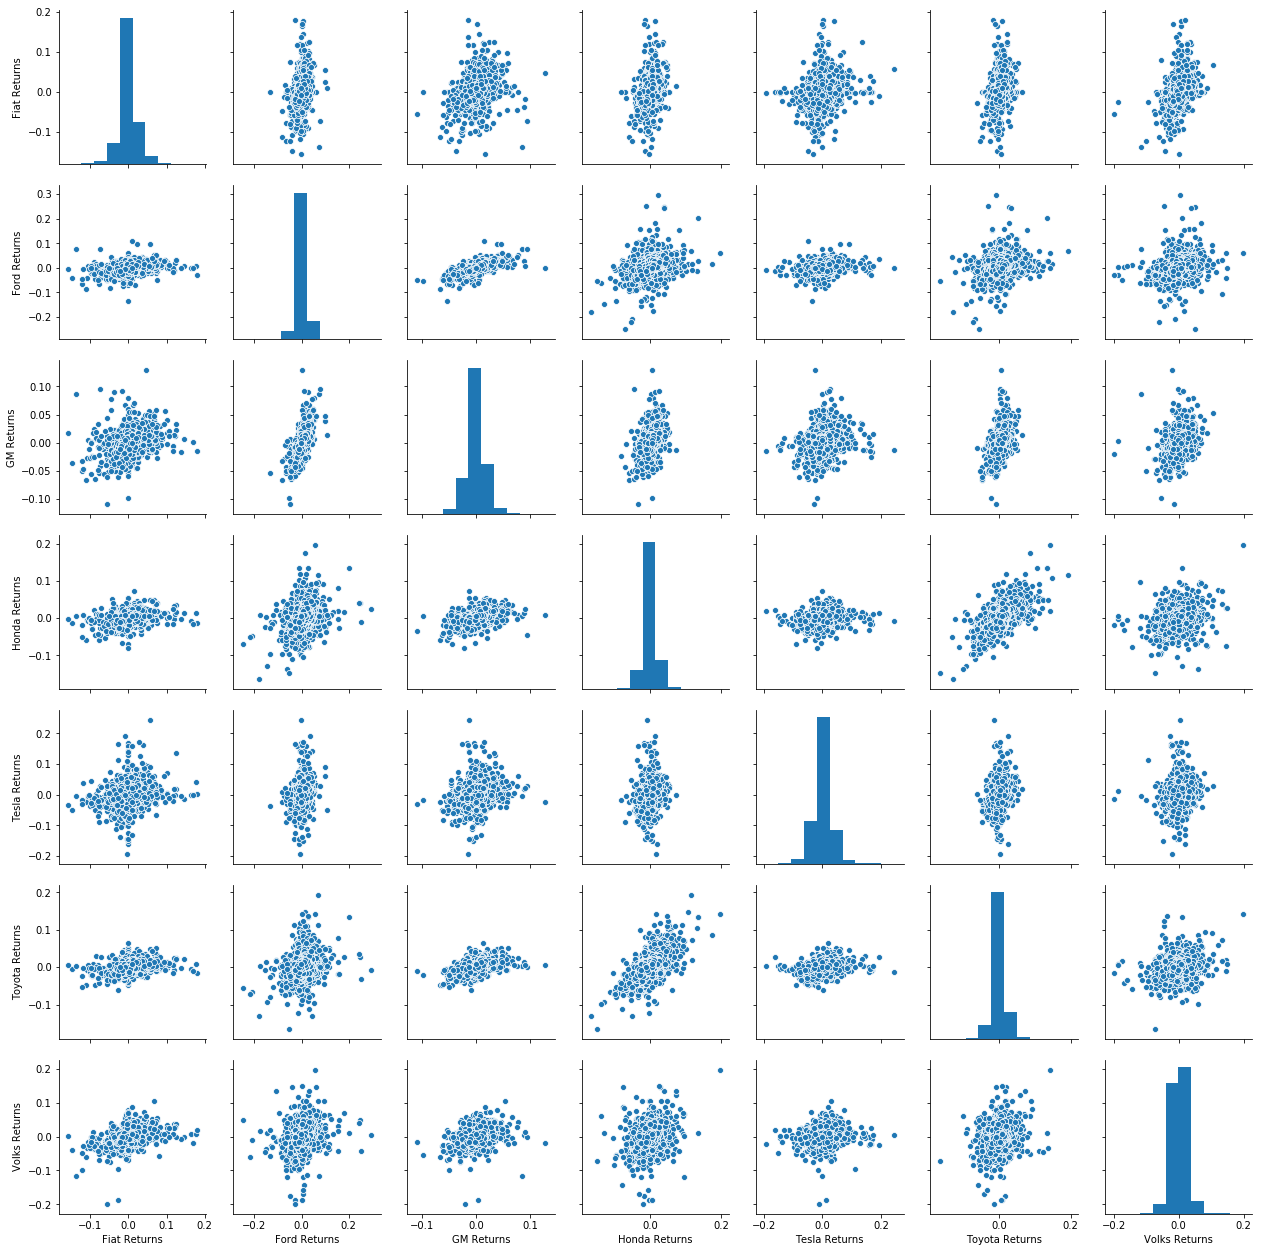

In [19]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Notice that 2 of the auto companies, Fiat & GM share have the worst drops couple of days apart, did anything significant happen that day? Similarly, Ford and Toyota had their worst drops in the month of November, 2008**

In [20]:
# Worst Drop 
returns.idxmin()

Fiat Returns     2011-11-07
Ford Returns     2008-11-19
GM Returns       2011-11-09
Honda Returns    1987-10-19
Tesla Returns    2012-01-13
Toyota Returns   2008-11-06
Volks Returns    2015-09-22
dtype: datetime64[ns]

In [21]:
# Best Single Day Gain
returns.idxmax()

Fiat Returns     2011-10-07
Ford Returns     2008-11-26
GM Returns       2018-05-31
Honda Returns    2008-10-28
Tesla Returns    2013-05-09
Toyota Returns   1987-10-21
Volks Returns    2008-10-28
dtype: datetime64[ns]

In [22]:
returns.describe()

,Fiat Returns,Ford Returns,GM Returns,Honda Returns,Tesla Returns,Toyota Returns,Volks Returns
count,2313.000000,11983.000000,2197.000000,10017.000000,2299.000000,10920.000000,5379.000000
mean,0.001021,0.000365,0.000169,0.000518,0.001416,0.000518,0.000434
std,0.027443,0.021881,0.017737,0.019214,0.032153,0.018324,0.023878
min,-0.157143,-0.250000,-0.109026,-0.163952,-0.193274,-0.165236,-0.198185
25%,-0.008596,-0.010705,-0.008977,-0.009740,-0.014411,-0.008563,-0.011243
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.009793,0.010774,0.009156,0.010000,0.017379,0.008798,0.012301
max,0.178947,0.295181,0.128734,0.196109,0.243951,0.193548,0.196886


In [23]:
print("Statistical analysis of auto stocks returns since January, 2019")
returns.loc['2019-01-01':'2019-05-24'].describe()

Statistical analysis of auto stocks returns since January, 2019


,Fiat Returns,Ford Returns,GM Returns,Honda Returns,Tesla Returns,Toyota Returns,Volks Returns
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-0.000875,0.002654,0.000594,-0.000307,-0.004962,0.000254,0.000396
std,0.023485,0.019910,0.015323,0.012279,0.030933,0.009852,0.015717
min,-0.122190,-0.062217,-0.042553,-0.031260,-0.129711,-0.024288,-0.047389
25%,-0.011065,-0.008272,-0.005897,-0.006211,-0.019794,-0.006003,-0.010919
50%,0.001371,0.001165,0.001280,0.001292,-0.001886,0.000492,-0.000406
75%,0.011635,0.012921,0.009493,0.006826,0.014188,0.006294,0.010444
max,0.062367,0.107447,0.070544,0.045559,0.057697,0.044309,0.042446


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [24]:
returns.std() # Tesla riskiest

Fiat Returns      0.027443
Ford Returns      0.021881
GM Returns        0.017737
Honda Returns     0.019214
Tesla Returns     0.032153
Toyota Returns    0.018324
Volks Returns     0.023878
dtype: float64

In [25]:
returns.loc['2019-01-01':'2019-05-24'].std() # Very similar risk profiles.

Fiat Returns      0.023485
Ford Returns      0.019910
GM Returns        0.015323
Honda Returns     0.012279
Tesla Returns     0.030933
Toyota Returns    0.009852
Volks Returns     0.015717
dtype: float64

** Create a distplot using seaborn of the 2019 returns for Tesla **

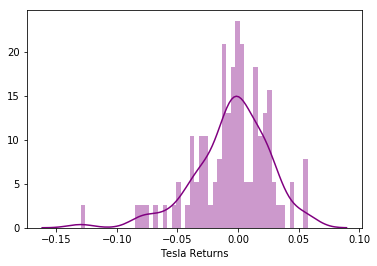

In [26]:
sns.distplot(returns.loc['2019-01-01':'2019-05-24']['Tesla Returns'],color='purple',bins=50)

** Create a distplot using seaborn of the 2008 returns for GM**

C:\Users\Christy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\Users\Christy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



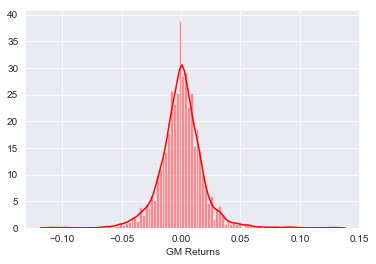

In [27]:
sns.set_style('darkgrid')
sns.distplot(returns.loc['2010-11-15':'2019-05-24']['GM Returns'],color='red',bins=100)

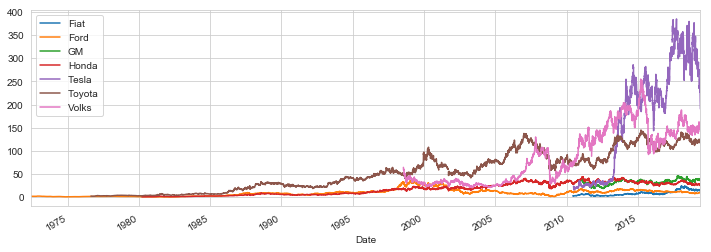

In [28]:
sns.set_style('whitegrid')
for tick in tickers:
    auto_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

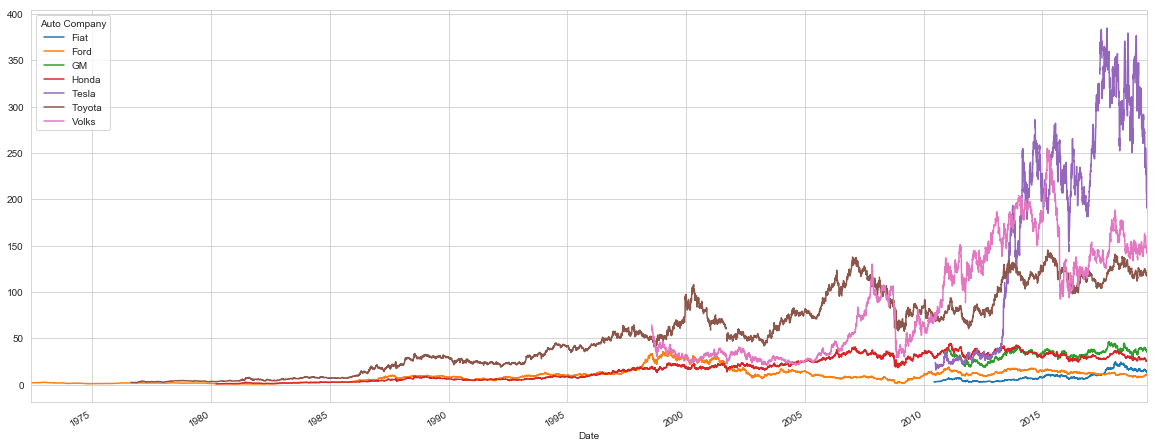

In [29]:
auto_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(20,8))

###### Moving Averages

To analyze the moving averages for these stocks the rolling 30 day average against the Close Price for auto stock for the past one year are plotted as follows:

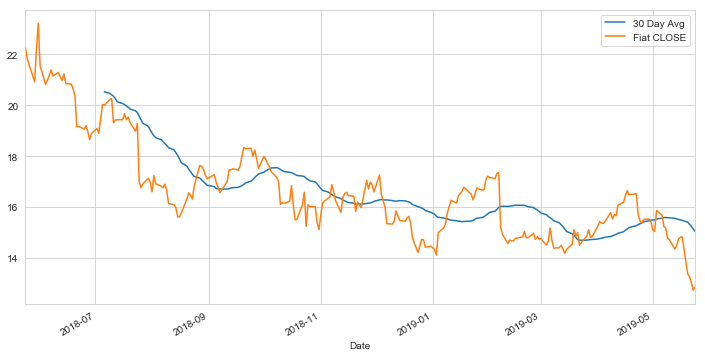

In [30]:
plt.figure(figsize=(12,6))
Fiat['Close'].loc['2018-05-24':'2019-05-24'].rolling(window=30).mean().plot(label='30 Day Avg')
Fiat['Close'].loc['2018-05-24':'2019-05-24'].plot(label='Fiat CLOSE')
plt.legend()

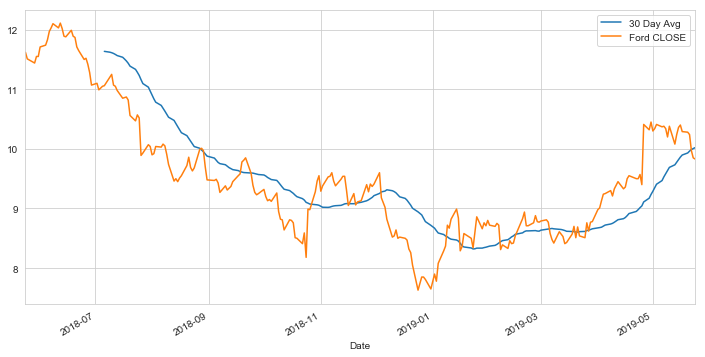

In [31]:
plt.figure(figsize=(12,6))
Ford['Close'].loc['2018-05-24':'2019-05-24'].rolling(window=30).mean().plot(label='30 Day Avg')
Ford['Close'].loc['2018-05-24':'2019-05-24'].plot(label='Ford CLOSE')
plt.legend()

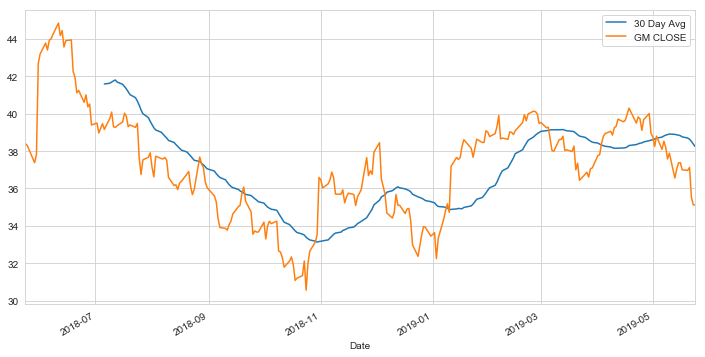

In [32]:
plt.figure(figsize=(12,6))
GM['Close'].loc['2018-05-24':'2019-05-24'].rolling(window=30).mean().plot(label='30 Day Avg')
GM['Close'].loc['2018-05-24':'2019-05-24'].plot(label='GM CLOSE')
plt.legend()

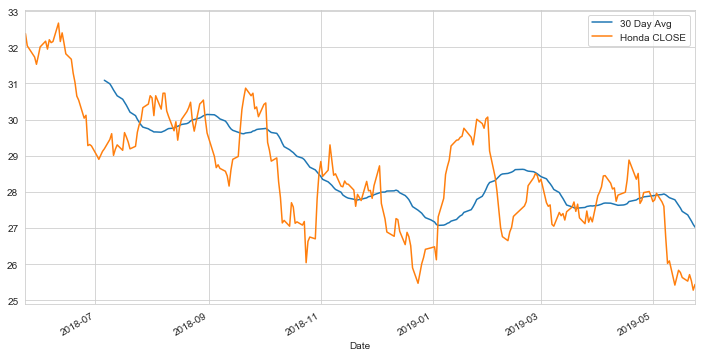

In [33]:
plt.figure(figsize=(12,6))
Honda['Close'].loc['2018-05-24':'2019-05-24'].rolling(window=30).mean().plot(label='30 Day Avg')
Honda['Close'].loc['2018-05-24':'2019-05-24'].plot(label='Honda CLOSE')
plt.legend()

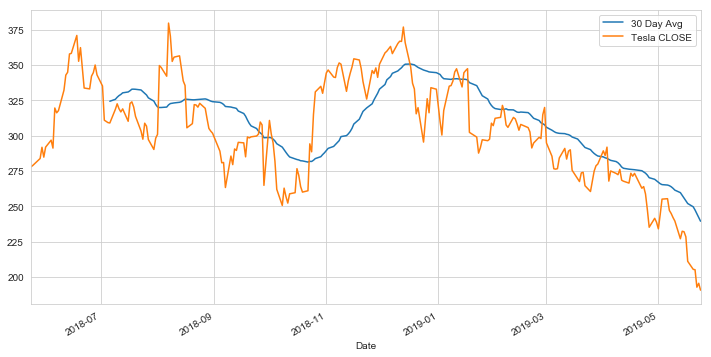

In [34]:
plt.figure(figsize=(12,6))
Tesla['Close'].loc['2018-05-24':'2019-05-24'].rolling(window=30).mean().plot(label='30 Day Avg')
Tesla['Close'].loc['2018-05-24':'2019-05-24'].plot(label='Tesla CLOSE')
plt.legend()

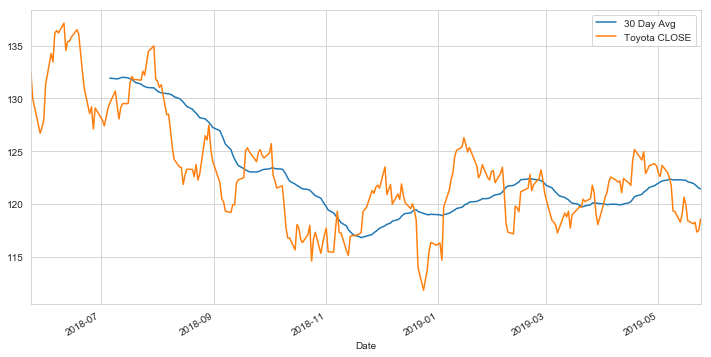

In [35]:
plt.figure(figsize=(12,6))
Toyota['Close'].loc['2018-05-24':'2019-05-24'].rolling(window=30).mean().plot(label='30 Day Avg')
Toyota['Close'].loc['2018-05-24':'2019-05-24'].plot(label='Toyota CLOSE')
plt.legend()

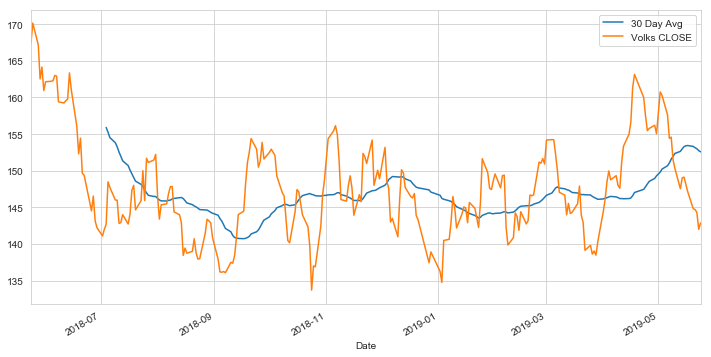

In [36]:
plt.figure(figsize=(12,6))
Volks['Close'].loc['2018-05-24':'2019-05-24'].rolling(window=30).mean().plot(label='30 Day Avg')
Volks['Close'].loc['2018-05-24':'2019-05-24'].plot(label='Volks CLOSE')
plt.legend()

#### Heat Map
A heatmap of the correlation between the stocks Close Price is also created.

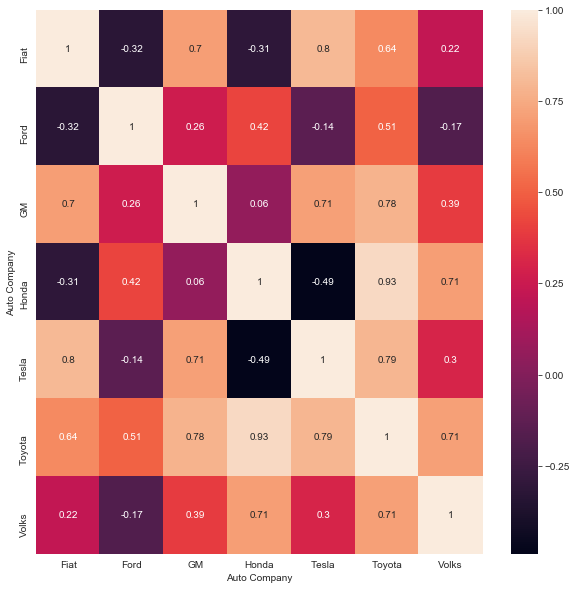

In [37]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(auto_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, ax = ax)